In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

## Load Data

In [2]:
df = pd.read_csv("training_data.csv")

In [3]:
df.head()

,review_id,business_id,user_id,text,date,stars
0,3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5
1,9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5
2,7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5
3,3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4
4,3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4


In [4]:
df['text length'] = df.text.apply(len)

In [5]:
print("Unique review ids:",len(df.review_id.unique()))
print("Unique business id:",len(df.business_id.unique()))
print("Unique user id:",len(df.user_id.unique()))

Unique review ids: 7997
Unique business id: 3637
Unique user id: 5400


### Take a look at the number of stars

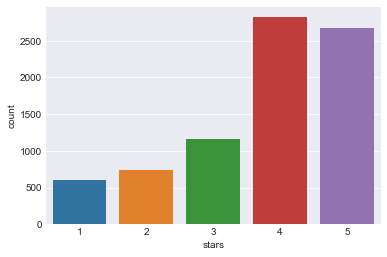

In [17]:
sns.countplot("stars",data=df)

### The length of the text data has a power-low distiobution

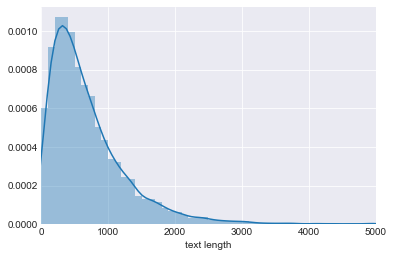

In [18]:
sns.distplot(df["text length"])
plt.xlim(0,5000)

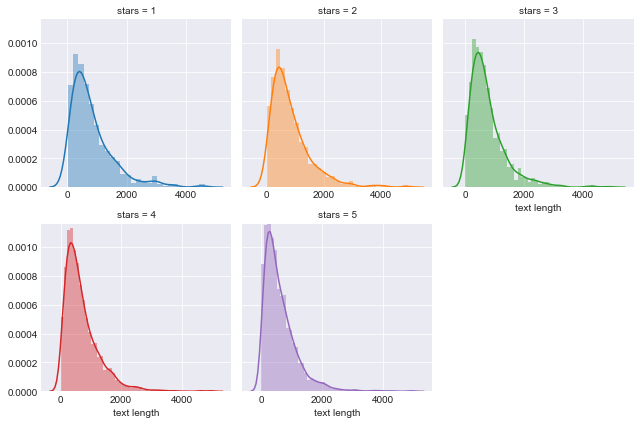

In [19]:
g = sns.FacetGrid(df,hue="stars",col="stars",col_wrap=3,sharex=0)
g.map(sns.distplot,"text length")

### Let's see if the length

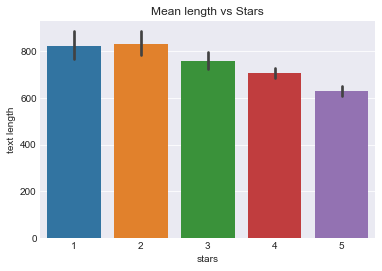

In [20]:
sns.barplot(x="stars",y="text length",data=df)
plt.title("Mean length vs Stars")

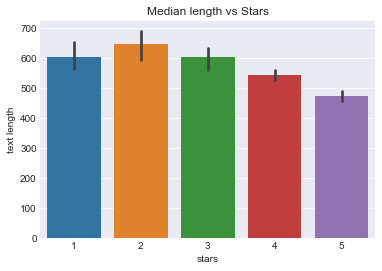

In [21]:
sns.barplot(x="stars",y="text length",data=df,estimator=np.median)
plt.title("Median length vs Stars")

In [11]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [12]:
five_stars_review = df[df.stars==1]["text"]
count_vec = CountVectorizer(stop_words="english")
five_stars_review = count_vec.fit_transform(five_stars_review.values)

In [13]:
frequency = dict()
frequency["freq"] = np.asarray(np.sum(five_stars_review,axis=0))[0]
frequency["names"] = count_vec.get_feature_names()

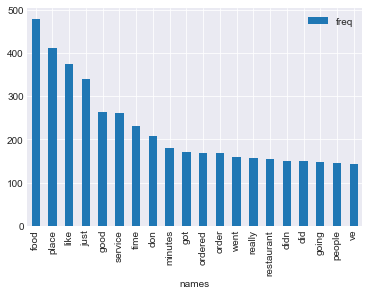

In [23]:
df_freq = pd.DataFrame(frequency)
df_freq.set_index("names",inplace=True)
df_freq.sort_values(by="freq",ascending=False)[:20].plot.bar()
plt.xticks(rotation="vertical")
plt.savefig("words",dpi=500)
plt.show()
